# Analysis Notebook
Load CSV logs and plot metrics (latency proxy, throughput, IDS alerts).

In [1]:
# Updated Automotive Gateway Security Analysis Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
import os
from pathlib import Path
import seaborn as sns

# Set style for professional plots
plt.style.use('seaborn-v0_8')
sns.set_palette("colorblind")

# Data directory
data_dir = Path("../data")
print(f"Data directory: {data_dir.absolute()}")

Data directory: c:\Users\USER\Desktop\new 1\secure_hybrid_gateway_project\notebooks\..\data


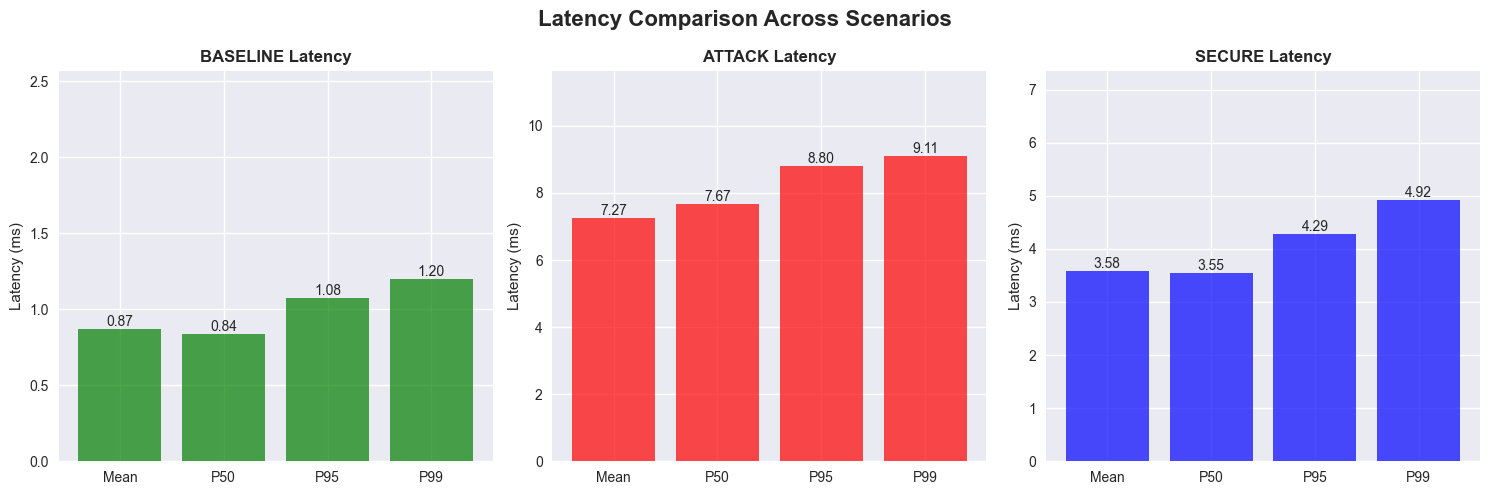

In [2]:
import json

def plot_latency_comparison():
    """Plot latency comparison across scenarios"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    metrics = {}
    
    data_dir = "../data"
    scenarios = ["baseline", "attack", "secure"]
    colors = ["green", "red", "blue"]
    
    # Load metrics from JSON files
    for scenario in scenarios:
        file_path = f"{data_dir}/{scenario}_metrics.json"
        with open(file_path, 'r') as f:
            metrics[scenario] = json.load(f)
    
    for idx, (scenario, color) in enumerate(zip(scenarios, colors)):
        if scenario in metrics:
            lat = metrics[scenario]["latency"]
            # Create bar plot
            bars = axes[idx].bar(
                ["Mean", "P50", "P95", "P99"],
                [lat["mean"], lat["p50"], lat["p95"], lat["p99"]],
                color=color,
                alpha=0.7
            )
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                             f'{height:.2f}',
                             ha='center', va='bottom')
            axes[idx].set_title(f"{scenario.upper()} Latency", fontweight='bold')
            axes[idx].set_ylabel("Latency (ms)")
            axes[idx].set_ylim(0, max(lat.values()) * 1.2)
    plt.suptitle("Latency Comparison Across Scenarios", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
plot_latency_comparison()

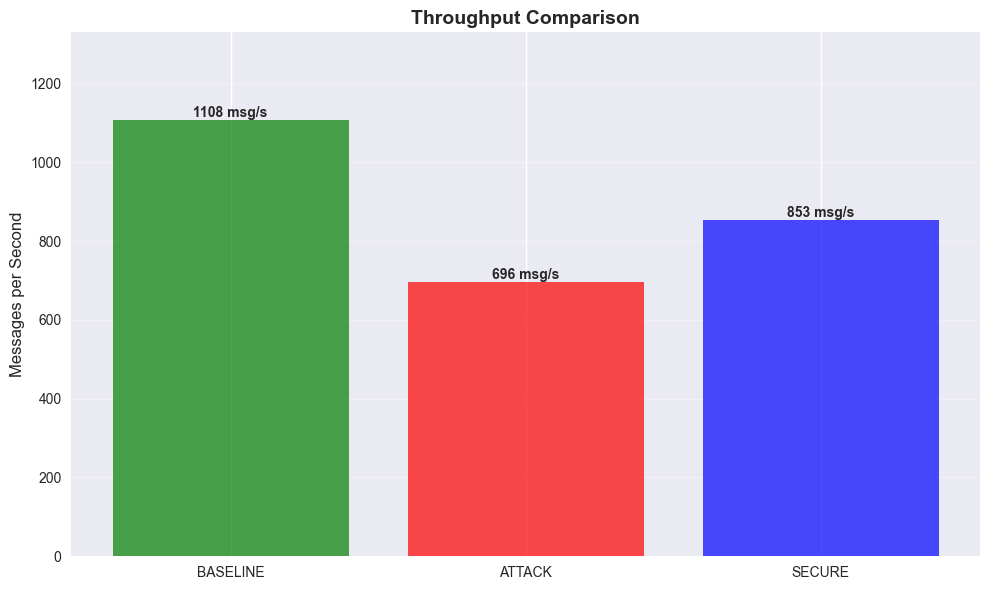

In [3]:
def plot_throughput_comparison():
    """Plot throughput comparison"""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    metrics = {}
    
    data_dir = "../data"
    scenarios_list = ["baseline", "attack", "secure"]
    
    # Load metrics from JSON files
    for scenario in scenarios_list:
        file_path = f"{data_dir}/{scenario}_metrics.json"
        with open(file_path, 'r') as f:
            metrics[scenario] = json.load(f)
    
    scenarios = []
    throughputs = []
    colors = []
    
    for scenario, color in [("baseline", "green"), ("attack", "red"), ("secure", "blue")]:
        if scenario in metrics:
            scenarios.append(scenario.upper())
            throughputs.append(metrics[scenario]["throughput"])
            colors.append(color)
    
    bars = ax.bar(scenarios, throughputs, color=colors, alpha=0.7)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.0f} msg/s',
               ha='center', va='bottom', fontweight='bold')
    
    ax.set_title("Throughput Comparison", fontsize=14, fontweight='bold')
    ax.set_ylabel("Messages per Second", fontsize=12)
    ax.set_ylim(0, max(throughputs) * 1.2)
    
    # Add grid
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
plot_throughput_comparison()

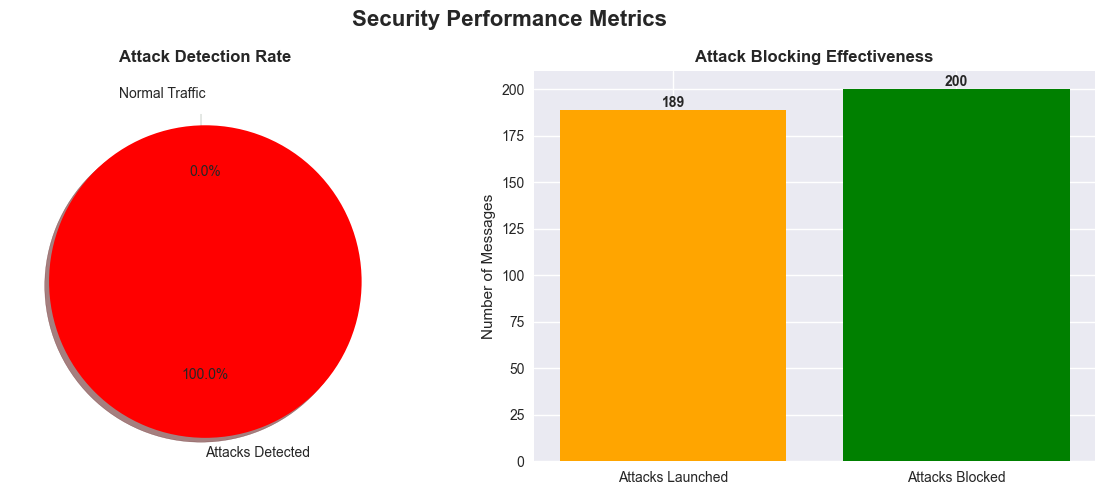

In [4]:
def plot_security_effectiveness():
    """Plot security metrics for attack detection"""
    
    metrics = {}
    
    data_dir = "../data"
    scenarios = ["baseline", "attack", "secure"]
    
    # Load metrics from JSON files
    for scenario in scenarios:
        file_path = f"{data_dir}/{scenario}_metrics.json"
        with open(file_path, 'r') as f:
            metrics[scenario] = json.load(f)
    
    if "secure" not in metrics or "security" not in metrics["secure"]:
        print("No security metrics available")
        return
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Detection metrics
    sec = metrics["secure"]["security"]
    total_msgs = metrics["secure"]["total_messages"]
    
    # Ensure non-negative values for pie chart
    detected = max(0, sec.get("detected", 0))
    normal_traffic = max(0, total_msgs - detected)
    
    # Handle edge case where detected might be greater than total
    if detected > total_msgs:
        detected = total_msgs
        normal_traffic = 0
    
    # Pie chart for detection
    sizes = [detected, normal_traffic]
    labels = ["Attacks Detected", "Normal Traffic"]
    colors = ["red", "green"]
    explode = (0.1, 0)
    
    # Only create pie chart if we have valid data
    if sum(sizes) > 0:
        ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=90)
        ax1.set_title("Attack Detection Rate", fontweight='bold')
    else:
        ax1.text(0.5, 0.5, "No data available", ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title("Attack Detection Rate", fontweight='bold')
    
    # Bar chart for blocking
    if "attack" in metrics:
        attack_msgs = max(0, metrics["attack"].get("attack_messages", 0))
        blocked_msgs = max(0, metrics["secure"].get("blocked_messages", 0))
        
        bars = ax2.bar(["Attacks Launched", "Attacks Blocked"], 
                      [attack_msgs, blocked_msgs],
                      color=["orange", "green"])
        
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}',
                   ha='center', va='bottom', fontweight='bold')
        
        ax2.set_title("Attack Blocking Effectiveness", fontweight='bold')
        ax2.set_ylabel("Number of Messages")
    else:
        ax2.text(0.5, 0.5, "No attack data available", ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title("Attack Blocking Effectiveness", fontweight='bold')
    
    plt.suptitle("Security Performance Metrics", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
plot_security_effectiveness()